In [1]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 145us/sample - loss: 0.9552
Epoch 2/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.9739
Epoch 3/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.9153
Epoch 4/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.8654
Epoch 5/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.8554
Epoch 6/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.7661
Epoch 7/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.7564
Epoch 8/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.7040
Epoch 9/100
1000/1000 [==============================] - 0s 64us/sample - loss: 0.7099
Epoch 10/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.5759
Epoch 11/100
1000/1000 [==============================] - 0s 66us/sample - loss: 0.5475
Epoch 12/100
1000/

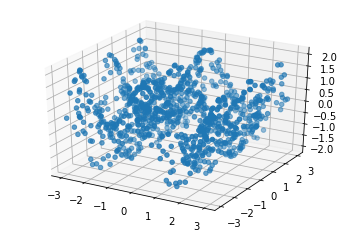

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 1000
X = np.random.random((N,2))*6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y) 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)                                   
])
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X,Y, epochs=100)

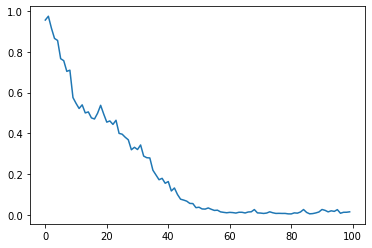

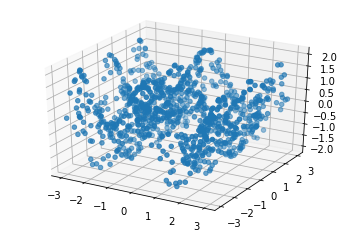

In [3]:
plt.plot(r.history['loss'],label='loss')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y) 

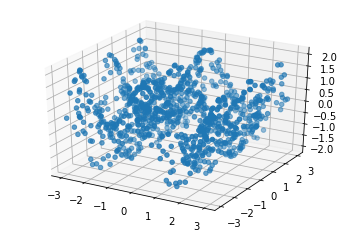

In [9]:
line = np.linspace(-5,5,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], yhat, linewidth=0.2 ,antialiased=True)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)